# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: David Rodriguez-Mayorquin

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

**Question 1**

 Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

I used the Spotify API to retrieve saved tracks from my own Spotify profile. The data was returned as JSON, which I processed  and converted into HTML file (saved_tracks.html). The file displays my saved Spotify tracks with clickable links to the Spotify pages for each song.

**Question 2** 

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [12]:
import pickle
import re
from bs4 import BeautifulSoup
from textblob import TextBlob

# Load the pickle file
with open("spotify_tracks.pkl", "rb") as pickle_file:
    html_content = pickle.load(pickle_file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Print first 1000 characters of extracted text for debugging
print("Extracted Text (First 1000 characters):")
print(repr(article_text[:1000]))

# Refined regex for splitting text into sentences
sentences = re.split(r'(?:\n{2,}|\n\s*|\s{2,}|(?<=[.!?]) +)', article_text)  # Split at newlines, double spaces, or punctuation
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]  # Remove empty sentences

# Count the number of sentences
num_sentences = len(sentences)

# Perform sentiment analysis on the entire text
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Print results
print("\nExtracted Sentences (First 10):", sentences[:10])  # Show the first 10 sentences for verification
print("Number of Sentences (Refined Split):", num_sentences)
print("\nPolarity Score:", polarity_score)


Extracted Text (First 1000 characters):
"Spotify Tracks\n\nTrack: Soy Sólo Un Secreto\nAlbum: Fuerza\nArtist: Alejandra Guzman\n    \n\nTrack: Time (Clock Of The Heart) - Remastered 2003\nAlbum: Culture Club\nArtist: Culture Club\n    \n\nTrack: Words - Original Version 1983\nAlbum: Words\nArtist: F.R. David\n    \n\nTrack: Leather Jacket\nAlbum: Leather Jacket\nArtist: The Vantages\n    \n\nTrack: Knowing Me Knowing You\nAlbum: Volumes\nArtist: MGT\n    \n\nTrack: Circle In The Sand\nAlbum: Heaven On Earth (Deluxe Edition)\nArtist: Belinda Carlisle\n    \n\nTrack: When Love Calls Your Name\nAlbum: Love Hurts\nArtist: Cher\n    \n\nTrack: I'll Be There Where The Heart Is\nAlbum: Flashdance (Original Soundtrack From The Motion Picture)\nArtist: Kim Carnes\n    \n\nTrack: CHIHIRO\nAlbum: HIT ME HARD AND SOFT\nArtist: Billie Eilish\n    \n\nTrack: What I Am\nAlbum: Shooting Rubberbands At The Stars\nArtist: Edie Brickell & New Bohemians\n    \n\nTrack: I Melt with You\nAlbum: After the Sn

The sentiment polarity score of 0.0232 suggests a slightly positive tone overall.

**Question3**

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [13]:
import spacy
from collections import Counter

# Load spaCy's pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Tokenize and filter valid tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.text.strip()
]

# Count token frequencies
token_counts = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_counts.most_common(5)

# Print the results
print("\nTop 5 Most Frequent Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")



Top 5 Most Frequent Tokens:
Token: 'track', Frequency: 20
Token: 'album', Frequency: 20
Token: 'artist', Frequency: 20
Token: 'love', Frequency: 3
Token: 'heart', Frequency: 2


**Question 4**

 Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [14]:
import spacy
from collections import Counter

# Load spaCy's pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Extract and filter lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and token.lemma_.strip()
]

# Count lemma frequencies
lemma_counts = Counter(lemmas)

# Get the 5 most frequent lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print results
print("\nTop 5 Most Frequent Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


Top 5 Most Frequent Lemmas:
Lemma: 'track', Frequency: 21
Lemma: 'album', Frequency: 20
Lemma: 'artist', Frequency: 20
Lemma: 'love', Frequency: 3
Lemma: 'heart', Frequency: 2


**Question 5** 

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

List of Sentence Polarity Scores:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6, 0.0, 0.5, 0.5, 0.0, 0.0, 0.375, 0.0, 0.0, -0.09583333333333334, 0.0, 0.0, 0.0, 0.13636363636363635, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.6999999999999998, -0.6999999999999998, 0.0, 0.0, 0.0, 0.0, -0.6, -0.6, 0.0, 0.5, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.4, 0.0, 0.0]


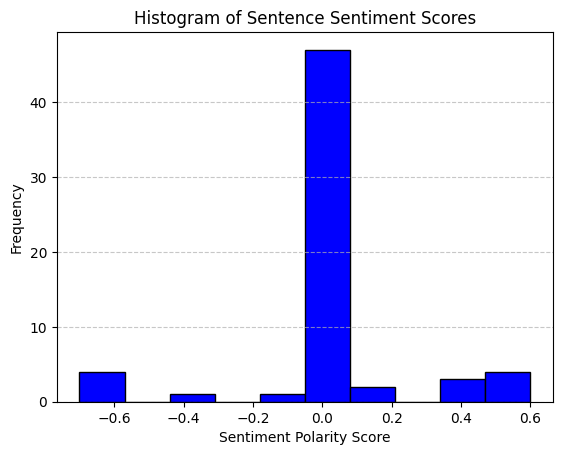

In [19]:
import matplotlib.pyplot as plt
from textblob import TextBlob

# Split the article into sentences
sentences = re.split(r'(?:\n{2,}|\n\s*|\s{2,}|(?<=[.!?]) +)', article_text)
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Perform sentiment polarity scores for each sentence
sentence_scores = [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Print the list of sentence polarity scores
print("List of Sentence Polarity Scores:")
print(sentence_scores)

# Plot the histogram of sentiment scores
plt.hist(sentence_scores, bins=10, color='blue', edgecolor='black')
plt.title("Histogram of Sentence Sentiment Scores")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# From the histogram, the most common range of sentiment polarity scores is approximately 0.0, 
# indicating neutral sentiment for the majority of sentences.


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?